<a href="https://colab.research.google.com/github/travislatchman/Face-Recognition-Classification-Algorithms/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import hog, local_binary_pattern


In [ ]:
# implemented knn from scratch (DID NOT USE)
def knn(X_train, X_test, y_train, y_test, k):
    predictions = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            distance = np.sqrt(np.sum(np.square(X_test[i] - X_train[j])))
            distances.append((distance, j))
        distances = sorted(distances)
        neighbors = [distances[m][1] for m in range(k)]
        labels = [y_train[n] for n in neighbors]
        prediction = max(set(labels), key=labels.count)
        predictions.append(prediction)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    return accuracy


In [ ]:
# set random seed for reproducibility
np.random.seed(42)


In [ ]:
# import the file YaleB-32x32.mat
YaleB = scipy.io.loadmat('YaleB_32x32.mat')


In [ ]:
# Access variables
fea = YaleB['fea'] # every row is a face
gnd = YaleB['gnd'].ravel() # labels


In [ ]:
# total number of images in the dataset (2414)
num_data = len(fea)
print(num_data)

# total number of labels in the dataset (2414)
num_labels = len(gnd)
print(num_labels)

2414
2414


In [ ]:
print(fea)

print(fea.shape) # each row is a face
print(gnd.shape) # labels for the face
print(fea.shape[0])

[[ 82  81  72 ...  35  33  22]
 [ 86  86  74 ...  20  14   9]
 [ 76  88  80 ...   9   6   6]
 ...
 [  3   3   3 ... 200 202 192]
 [  3   3   3 ... 253 255 250]
 [  5   3   4 ... 174 175 179]]
(2414, 1024)
(2414,)
2414


In [ ]:
# indexing one individual in the dataset
fea[0]
print(len(fea[0])) #1024 - pixels for the image of one 1 face/1individual

1024


In [ ]:
# get unique labels in the dataset - should be 38 individuals
unique_labels = np.unique(gnd)
print(unique_labels)
print(len(unique_labels))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
38


In [ ]:
# Define the number of images per individual
m_list = [10, 20, 30, 40, 50]

# Initialize a list to store classification errors for each split
classification_errors1 = []

k=1


In [ ]:
# Iterate through each value of m in m_list
for m in m_list:

    # Randomly select m images per individual with labels to form the training set
    train_data = []  # list to store training data
    train_labels = []  # list to store training labels
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm (with k=1) on each split
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(train_data, train_labels)

    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors1.append(errors)


In [ ]:
print(classification_errors1)


[56.04719764011799, 40.87061668681983, 34.69387755102041, 28.299776286353467, 24.124513618677042]


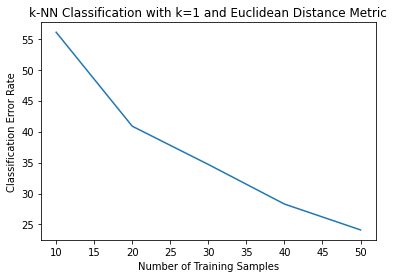

In [ ]:
# plot classification error rate vs number of training samples
plt.plot(m_list, classification_errors1)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with k=1 and Euclidean Distance Metric')
plt.show()


### Based on the plot, we can see that the classification error rate decreases as the number of training samples increases. This is expected, as having more training data allows the model to better capture the patterns in the data and make more accurate predictions. However, the rate of improvement starts to slow down as the number of training samples gets larger. In this case, using around 30 training samples per individual seems to give good performance without requiring too much training data.

In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


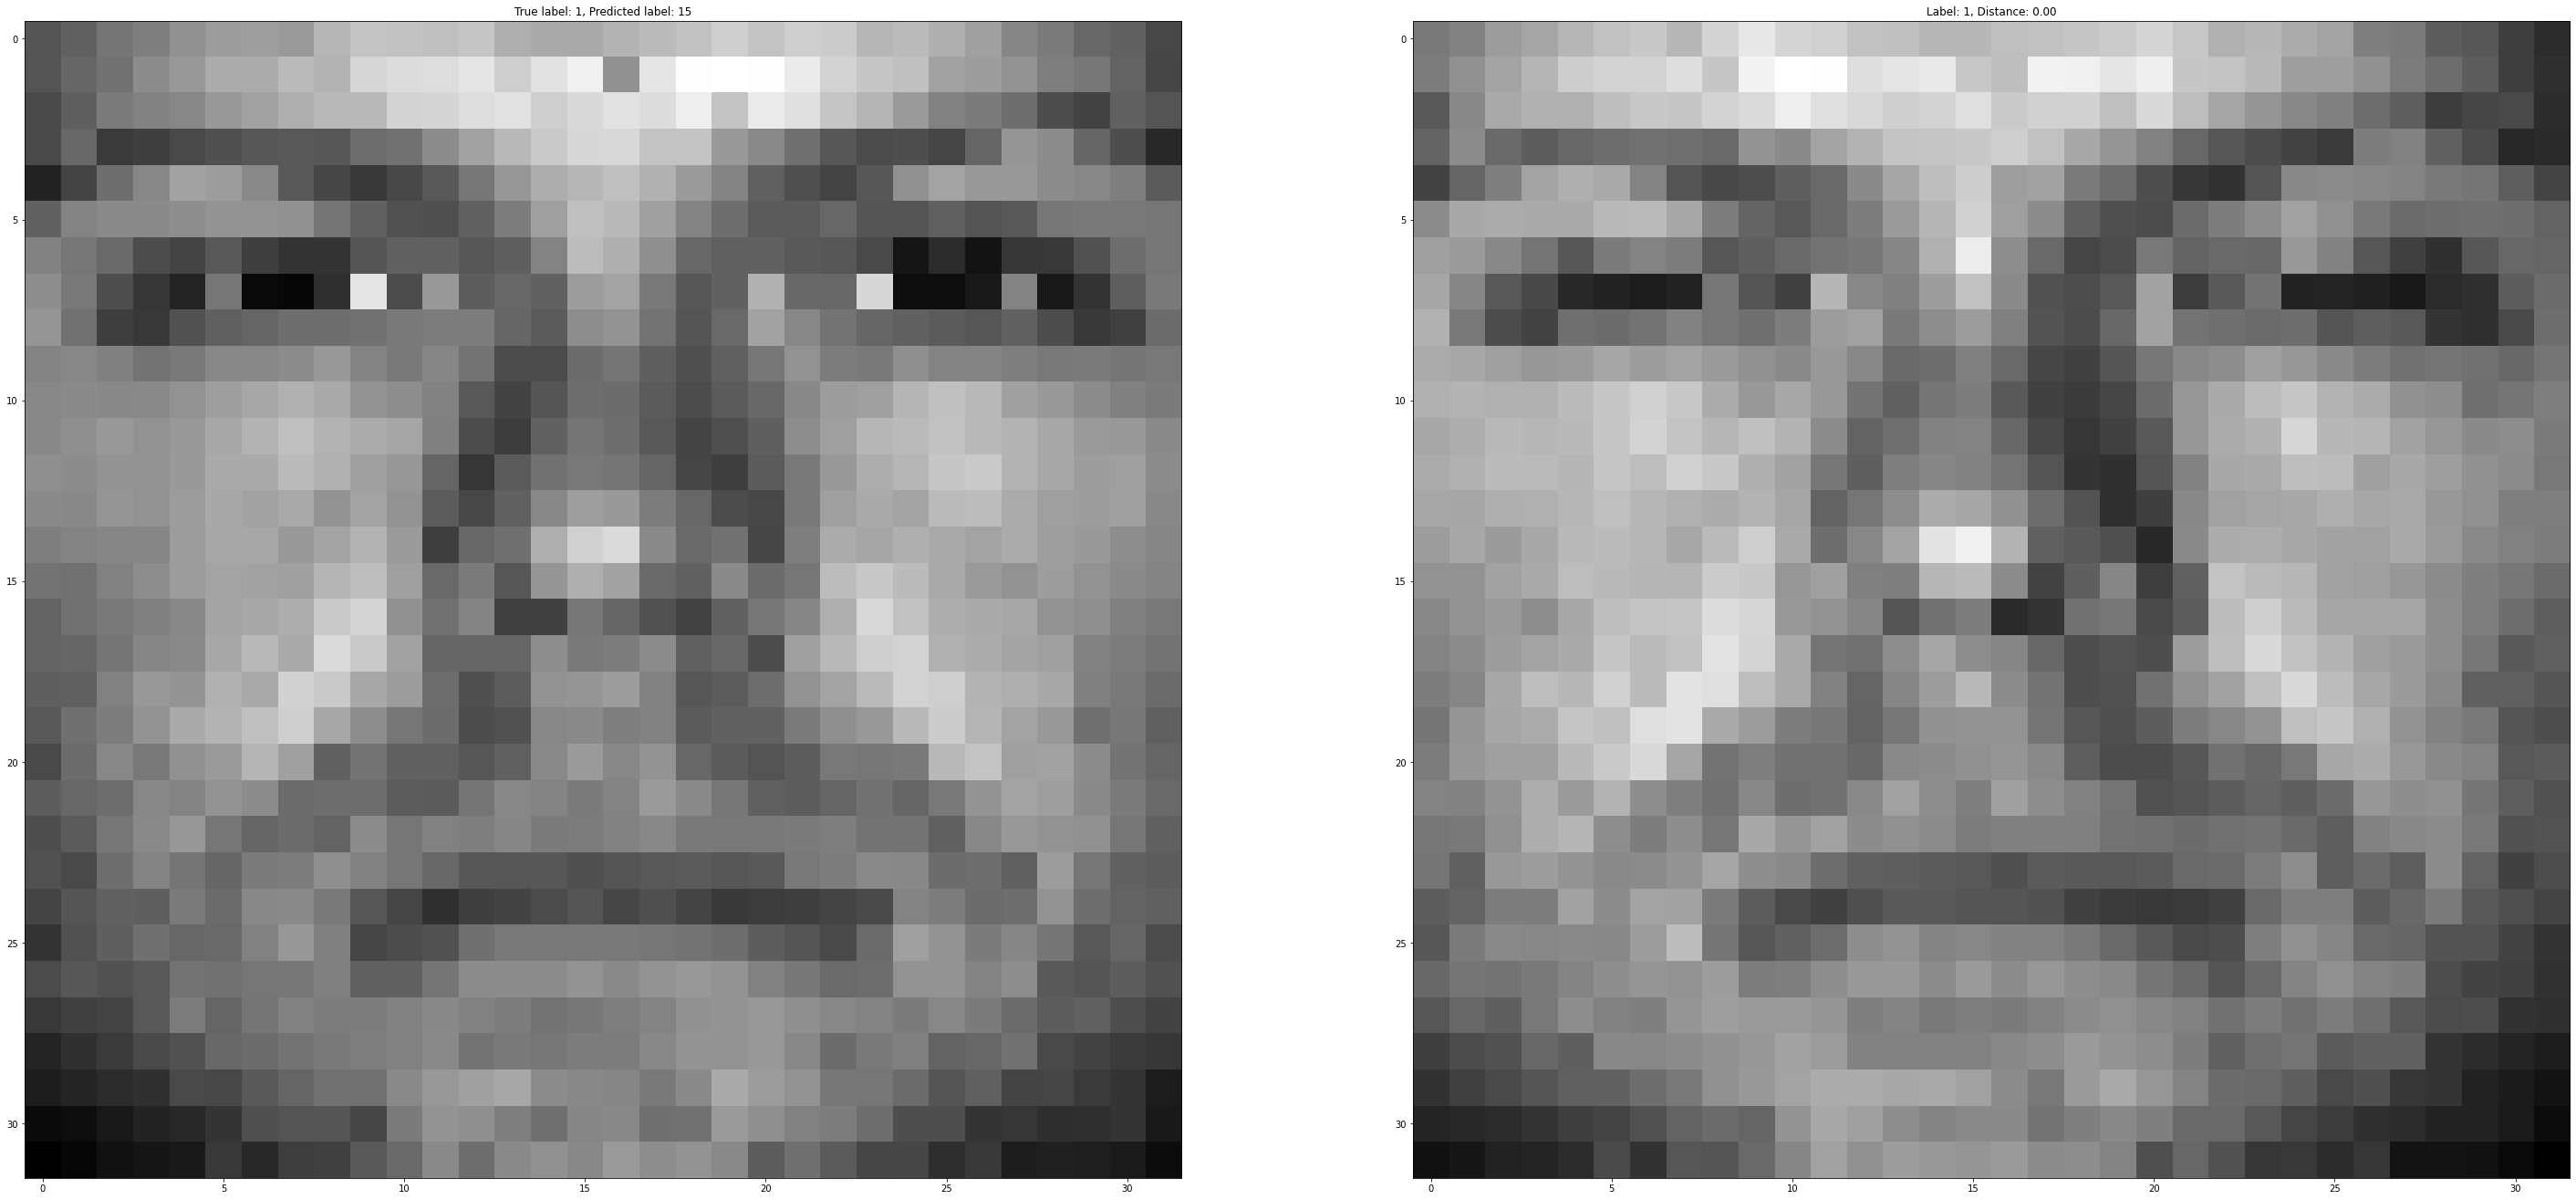

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


## 2. Repeat the above procedure for k = 2, 3, 5, 10 and plot the error rate E against k.


### k = 2

In [ ]:
# Initialize a list to store classification errors for each split
classification_errors2 = []

k = 2

In [ ]:
# Iterate through each value of m in m_list
for m in m_list:

    # Randomly select m images per individual with labels to form the training set
    train_data = []  # list to store training data
    train_labels = []  # list to store training labels
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm (with k=1) on each split
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(train_data, train_labels)

    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors2.append(errors)


In [ ]:
print(classification_errors2)


[64.30678466076697, 51.511487303506655, 42.700156985871274, 39.14988814317674, 32.87937743190661]


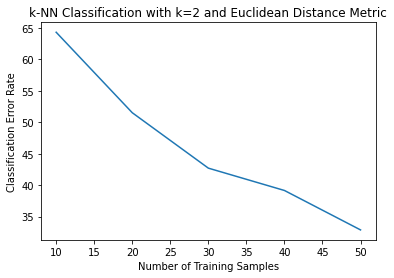

In [ ]:
# plot classification error rate vs number of training samples
plt.plot(m_list, classification_errors2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with k=2 and Euclidean Distance Metric')
plt.show()


In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


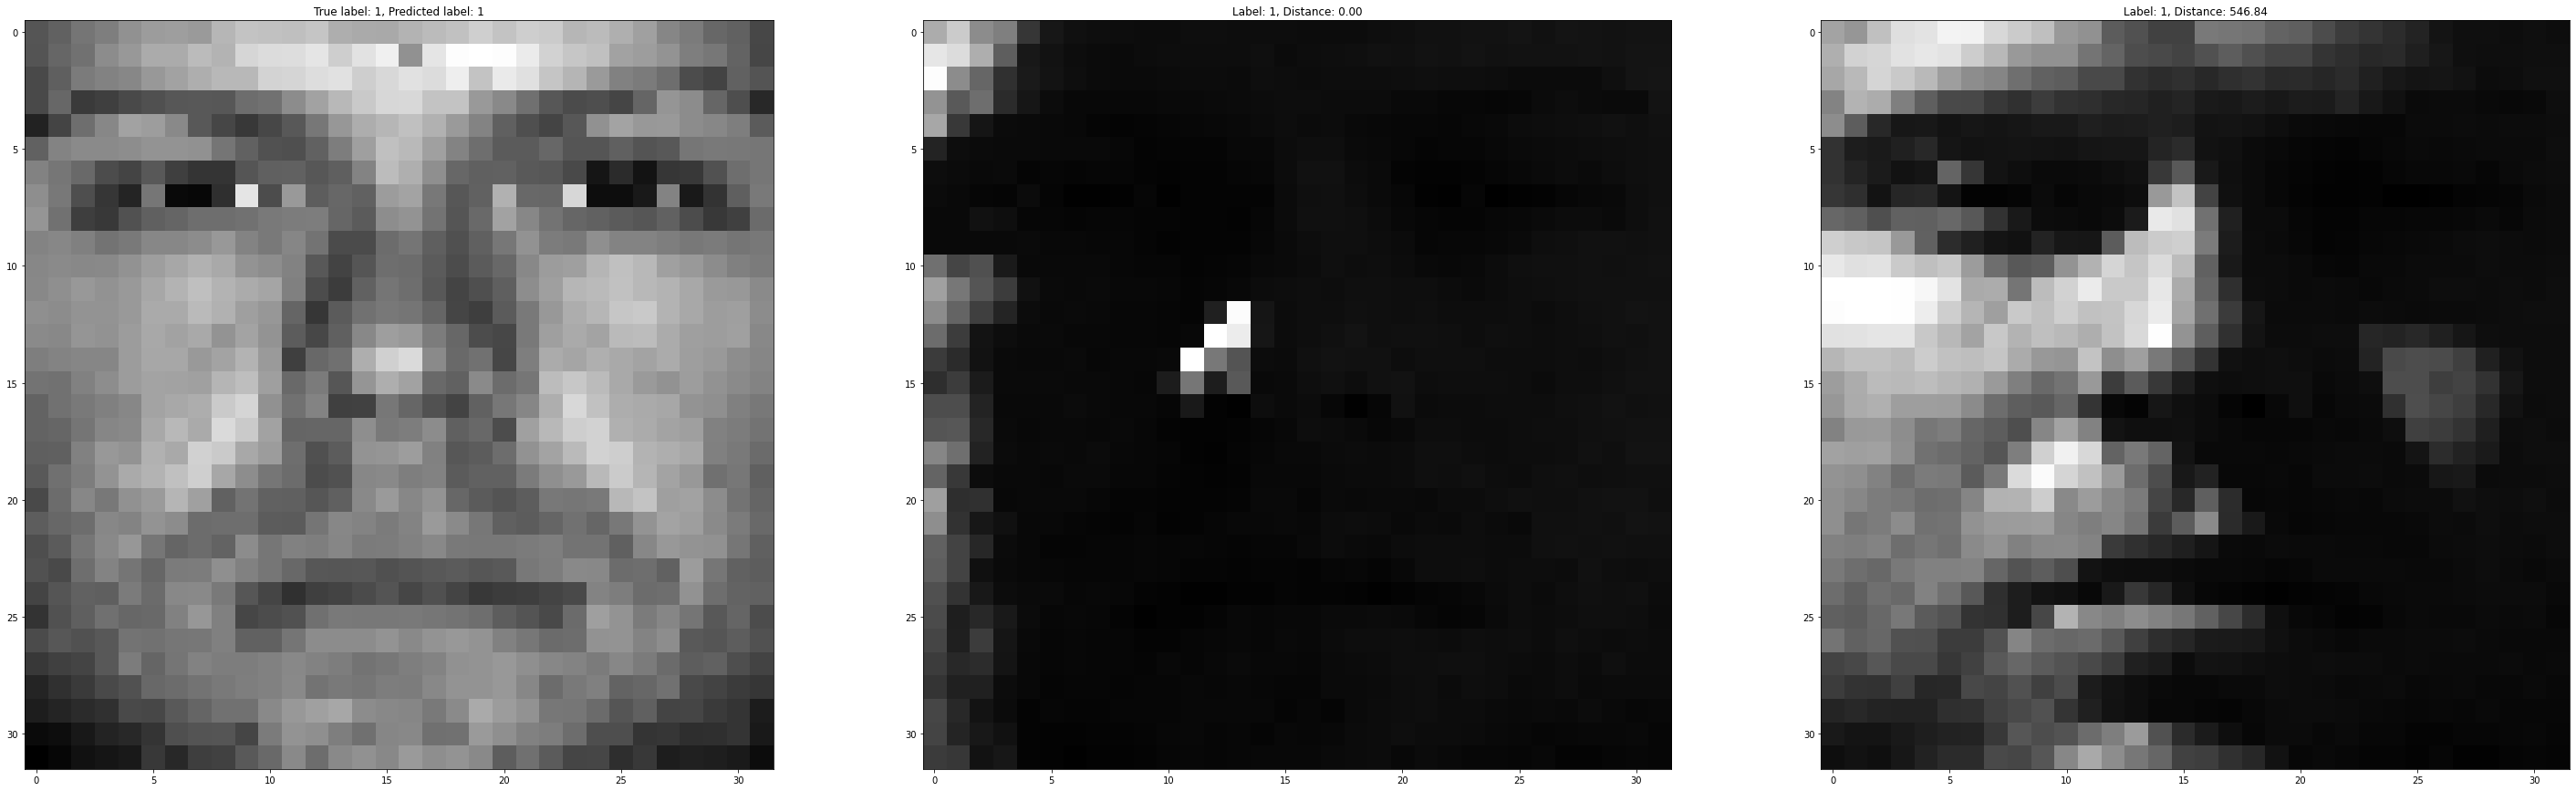

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


### k = 3

In [ ]:
# Initialize a list to store classification errors for each split
classification_errors3 = []

k = 3

In [ ]:
# Iterate through each value of m in m_list
for m in m_list:

    # Randomly select m images per individual with labels to form the training set
    train_data = []  # list to store training data
    train_labels = []  # list to store training labels
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm (with k=1) on each split
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(train_data, train_labels)

    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors3.append(errors)


In [ ]:
print(classification_errors3)


[68.68239921337266, 53.3857315598549, 45.368916797488225, 39.038031319910516, 35.992217898832685]


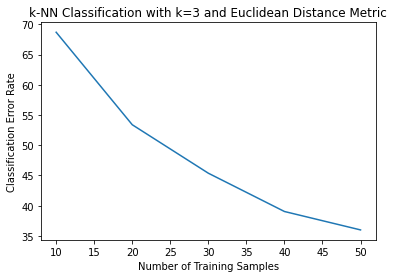

In [ ]:
# plot classification error rate vs number of training samples
plt.plot(m_list, classification_errors3)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with k=3 and Euclidean Distance Metric')
plt.show()


In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


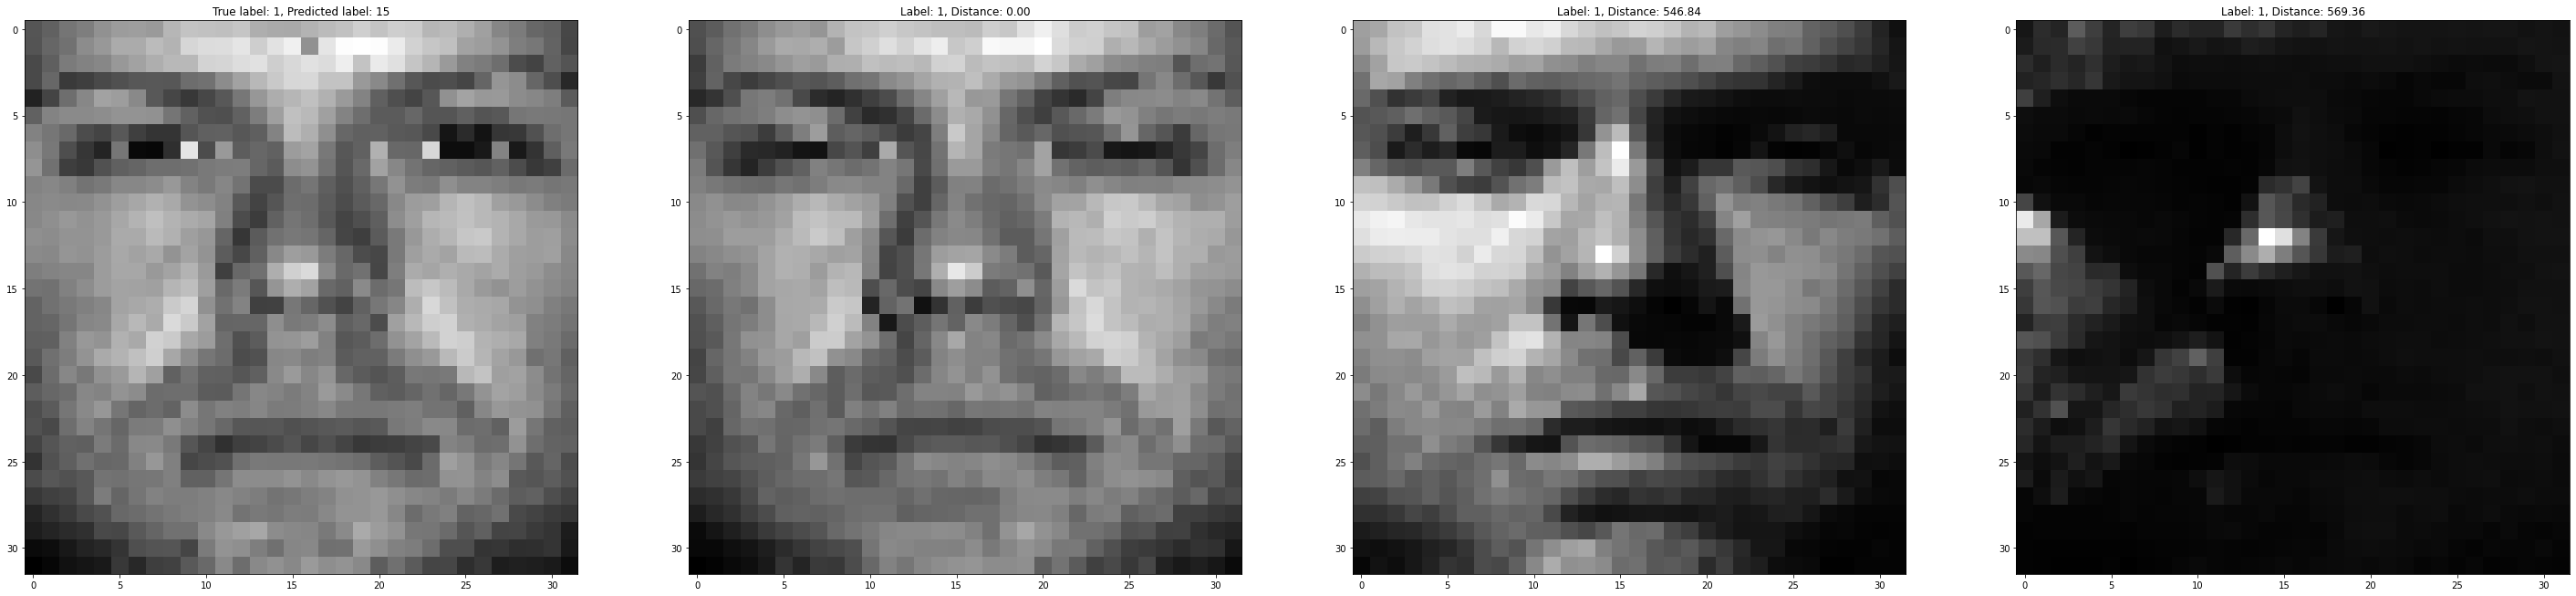

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


### k = 5

In [ ]:
# Initialize a list to store classification errors for each split
classification_errors5 = []

k = 5

In [ ]:
# Iterate through each value of m in m_list
for m in m_list:

    # Randomly select m images per individual with labels to form the training set
    train_data = []  # list to store training data
    train_labels = []  # list to store training labels
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm (with k=1) on each split
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(train_data, train_labels)

    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors5.append(errors)


In [ ]:
print(classification_errors5)


[72.02556538839725, 55.139056831922616, 44.81946624803768, 40.380313199105146, 32.68482490272373]


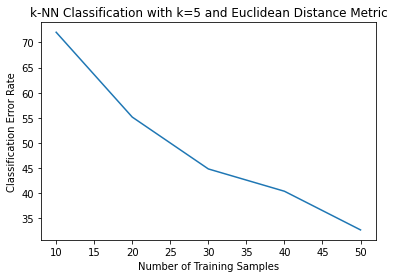

In [ ]:
# plot classification error rate vs number of training samples
plt.plot(m_list, classification_errors5)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with k=5 and Euclidean Distance Metric')
plt.show()


In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


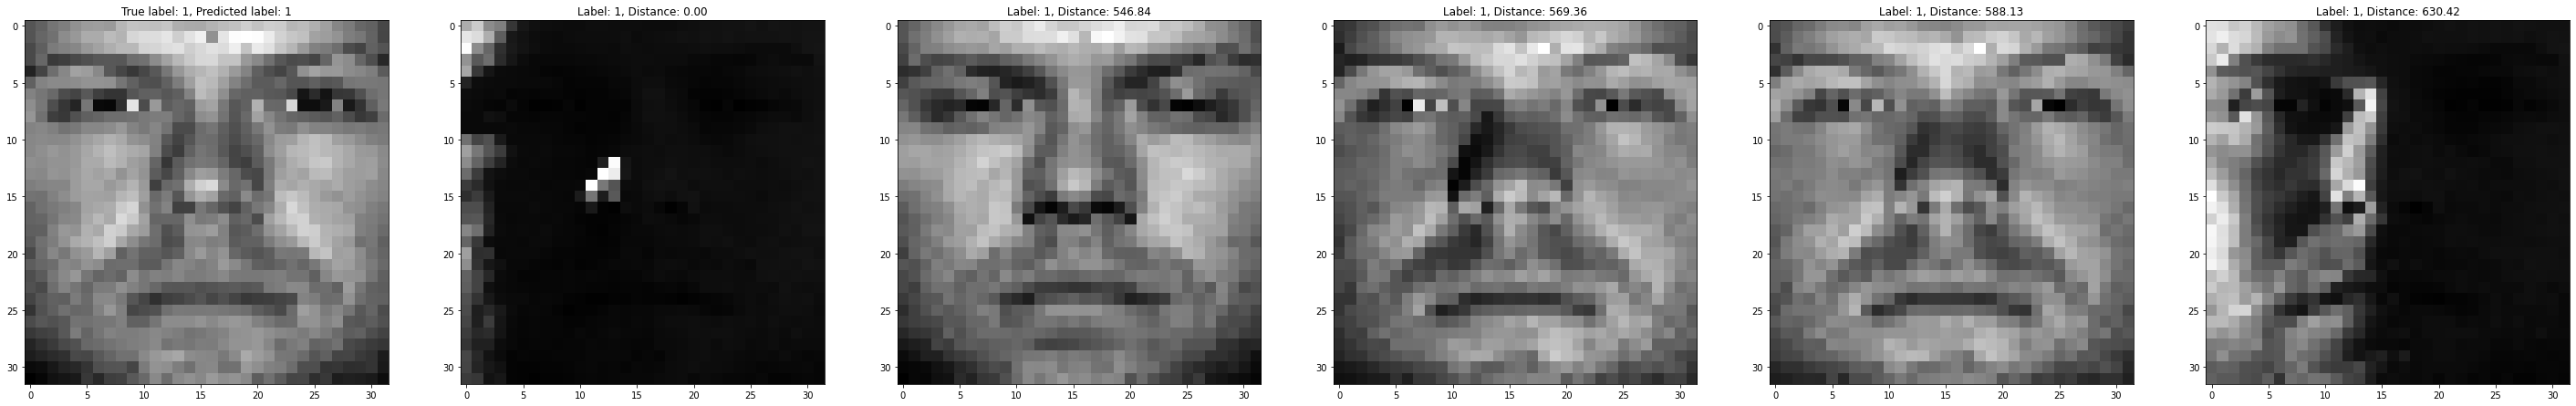

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


### k =10

In [ ]:
# Initialize a list to store classification errors for each split
classification_errors10 = []

k = 10

In [ ]:
# Iterate through each value of m in m_list
for m in m_list:

    # Randomly select m images per individual with labels to form the training set
    train_data = []  # list to store training data
    train_labels = []  # list to store training labels
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm (with k=1) on each split
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    knn.fit(train_data, train_labels)

    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors10.append(errors)


In [ ]:
print(classification_errors10)


[75.51622418879056, 59.008464328899635, 51.25588697017268, 42.281879194630875, 37.7431906614786]


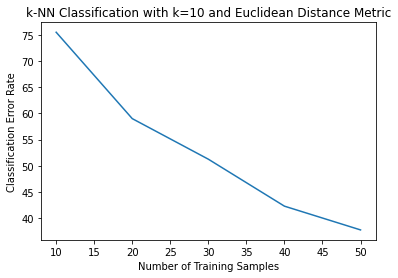

In [ ]:
# plot classification error rate vs number of training samples
plt.plot(m_list, classification_errors10)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with k=10 and Euclidean Distance Metric')
plt.show()


In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


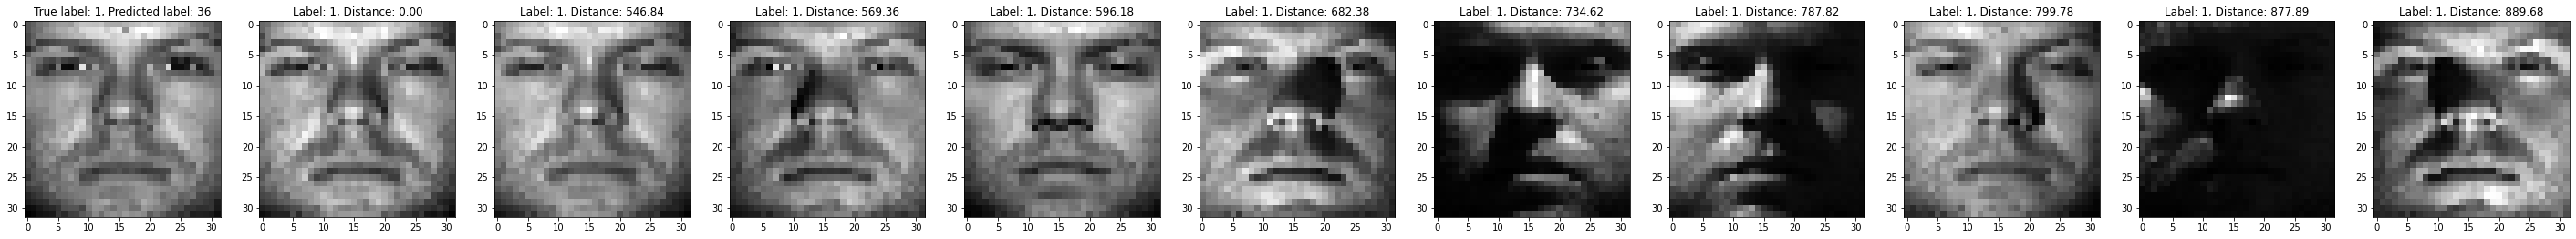

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


In [ ]:
#initialize variables for storing classification errors and k values
classification_errors = []
k_values = [1, 2, 3, 5, 10]


In [ ]:
for k in k_values:
    # initialize variable for storing total classification error rate across splits
    total_classification_error = 0

    # Iterate through each value of m in m_list
    for m in m_list:

        # Randomly select m images per individual with labels to form the training set
        train_data = []  # list to store training data
        train_labels = []  # list to store training labels
        test_data = []
        test_labels = []

        # loop over each label and randomly select m images for the training set
        for label in unique_labels:
            label_indices = np.where(gnd == label)[0]
            np.random.shuffle(label_indices)
            train_indices = label_indices[:m]
            test_indices = label_indices[m:]
            train_data.append(fea[train_indices])
            train_labels.append(gnd[train_indices])
            test_data.append(fea[test_indices])
            test_labels.append(gnd[test_indices])

        # concatenate training and test data for each label into a single array
        train_data = np.concatenate(train_data, axis=0)
        train_labels = np.concatenate(train_labels, axis=0)
        test_data = np.concatenate(test_data, axis=0)
        test_labels = np.concatenate(test_labels, axis=0)

        # apply k-NN algorithm (with k=1) on each split
        knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

        knn.fit(train_data, train_labels)

        predictions = knn.predict(test_data)

        error = (np.sum((predictions != test_labels)) / len(test_labels))*100
        total_classification_error += error

    # calculate average classification error rate across splits for current value of k
    average_classification_error = total_classification_error / 5
    classification_errors.append(average_classification_error)


In [ ]:
print(classification_errors)

[36.85898966795061, 37.054154233255616, 37.54995281372114, 37.317008582744066, 37.43568694370498]


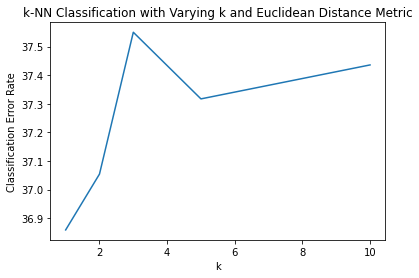

In [ ]:
plt.plot(k_values, classification_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k and Euclidean Distance Metric')
plt.show()

In [ ]:
k = [classification_errors1, classification_errors2, classification_errors3, classification_errors5, classification_errors10]


In [ ]:
# plot the error rate against k, we need to see how each set of m images used in the train set performed with increasing k neighbors
ten_errors = [row[0] for row in k]
twenty_errors = [row[1] for row in k]
thirty_errors = [row[2] for row in k]
forty_errors = [row[3] for row in k]
fifty_errors = [row[4] for row in k]


In [ ]:
# k_1 = [56.04719764011799, 40.87061668681983, 34.69387755102041, 28.299776286353467, 24.124513618677042]
# k_2 = [64.30678466076697, 51.511487303506655,42.700156985871274, 39.14988814317674, 32.87937743190661]
# k_3 = [68.68239921337266, 53.3857315598549,45.368916797488225, 39.038031319910516, 35.992217898832685]
# k_5 = [72.02556538839725, 55.139056831922616,44.81946624803768, 40.380313199105146, 32.68482490272373]
# k_10 = [75.51622418879056, 59.008464328899635, 51.25588697017268,42.281879194630875, 37.7431906614786]


In [ ]:
#k = [k_1, k_2, k_3, k_5, k_10]
k = [classification_errors1, classification_errors2, classification_errors3, classification_errors5, classification_errors10]


In [ ]:
print(k)

[[56.04719764011799, 40.87061668681983, 34.69387755102041, 28.299776286353467, 24.124513618677042], [64.30678466076697, 51.511487303506655, 42.700156985871274, 39.14988814317674, 32.87937743190661], [68.68239921337266, 53.3857315598549, 45.368916797488225, 39.038031319910516, 35.992217898832685], [72.02556538839725, 55.139056831922616, 44.81946624803768, 40.380313199105146, 32.68482490272373], [75.51622418879056, 59.008464328899635, 51.25588697017268, 42.281879194630875, 37.7431906614786]]


In [ ]:
print(ten_errors)

[56.04719764011799, 64.30678466076697, 68.68239921337266, 72.02556538839725, 75.51622418879056]


In [ ]:
print(twenty_errors)

[40.87061668681983, 51.511487303506655, 53.3857315598549, 55.139056831922616, 59.008464328899635]


In [ ]:
print(thirty_errors)

[34.69387755102041, 42.700156985871274, 45.368916797488225, 44.81946624803768, 51.25588697017268]


In [ ]:
print(forty_errors)

[28.299776286353467, 39.14988814317674, 39.038031319910516, 40.380313199105146, 42.281879194630875]


In [ ]:
print(fifty_errors)

[24.124513618677042, 32.87937743190661, 35.992217898832685, 32.68482490272373, 37.7431906614786]


In [ ]:
k = [1, 2, 3, 5, 10]

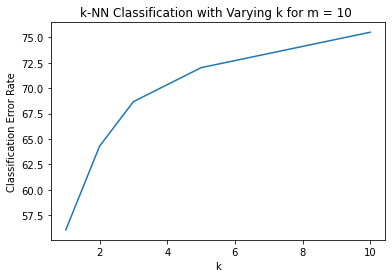

In [ ]:
plt.plot(k, ten_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k for m = 10 ')
plt.show()


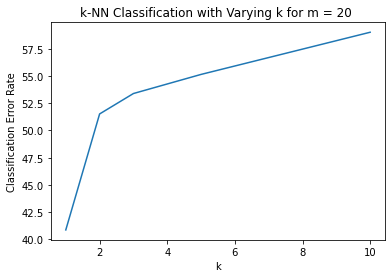

In [ ]:
plt.plot(k, twenty_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k for m = 20 ')
plt.show()


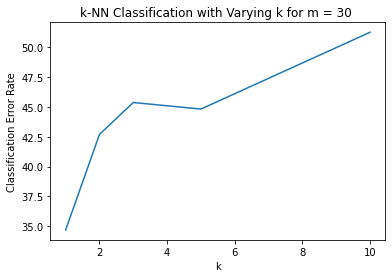

In [ ]:
plt.plot(k, thirty_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k for m = 30 ')
plt.show()


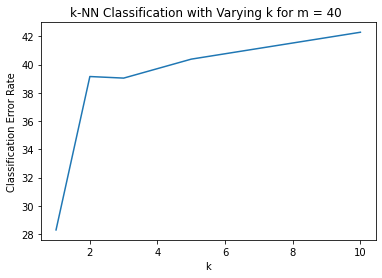

In [ ]:
plt.plot(k, forty_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k for m = 40 ')
plt.show()


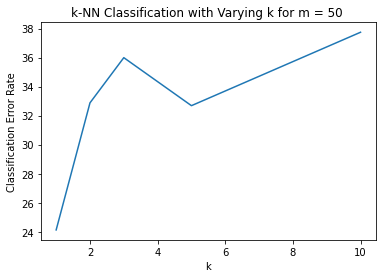

In [ ]:
plt.plot(k, fifty_errors)
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying k for m = 50 ')
plt.show()


### The error rate surprisingly does not decrease as k increases. It actually does the opposite and the classification error rate increases. I expected that the classification error rate generally decreases as the value of k increases. This is because increasing the value of k makes the decision boundary smoother and reduces the impact of noise in the data. My prediction as to why this is happening is the data quality with the use of pixels as features. The images in the dataset are very noisy and pixelated. Noisy data: If the data has a lot of noise or irrelevant features, including more neighbors in the classification process can increase the impact of the noisy data, resulting in a higher error rate. In such cases, using feature selection techniques or reducing the dimensionality of the data may be useful in improving classification accuracy. Including more images as k increases leads to a degradation in classification performance. The error rate is not always supposed to continually decrease as k increases. There is an optimal k value, and generally including more neighbors leads to overfitting. As the number of training samples increases, the classifier may start to overfit to the training data, resulting in poor generalization performance on the test set. As the number of neighbors increases, the model becomes more complex and can start to fit the training data too closely


In [ ]:
misclassified_indices = np.where(predictions != gnd)[0]
index = np.random.choice(misclassified_indices)


/var/folders/8y/f5g9vg312nj09bbbdbnk_klr0000gn/T/ipykernel_83948/1928389294.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(predictions != gnd)[0]


In [ ]:
# find k nearest neighbors of the misclassified sample
k = 10
distances, indices = knn.kneighbors(fea[index].reshape(1, -1), n_neighbors=k)


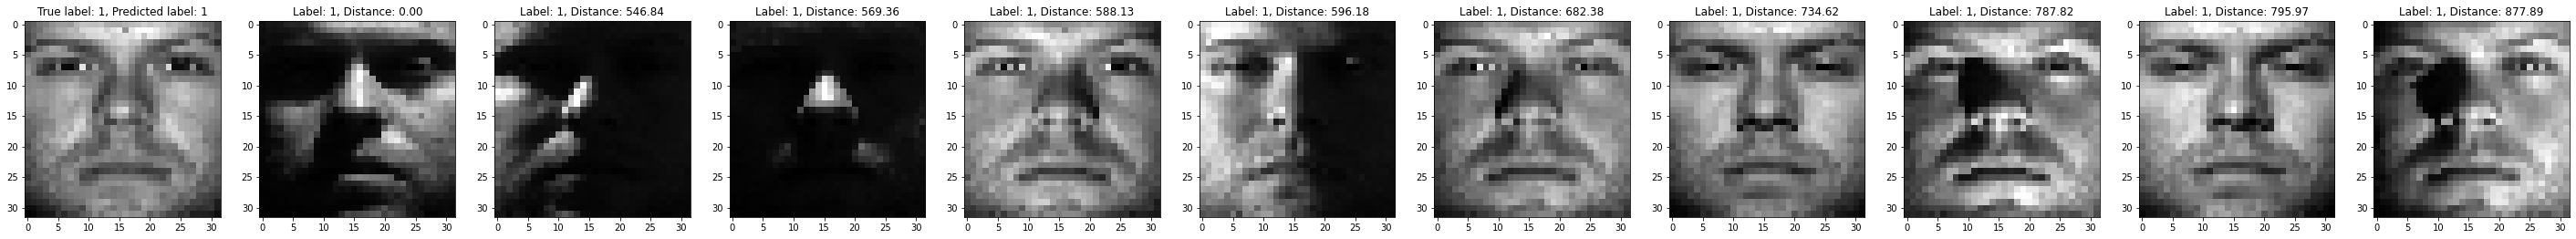

In [ ]:
# plot the misclassified sample and its k nearest neighbors
fig, axes = plt.subplots(1, k+1, figsize=(50, 50))
sample = fea[index].reshape((32, 32)).T
axes[0].imshow(sample, cmap='gray')
axes[0].set_title(f"True label: {gnd[index]}, Predicted label: {predictions[index]}")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_sample = fea[neighbor_index].reshape((32, 32)).T
    axes[i+1].imshow(neighbor_sample, cmap='gray')
    axes[i +1].set_title(f"Label: {gnd[neighbor_index]}, Distance: {distances[0][i]:.2f}")
plt.show()


## 3. Let k = 3 and select m = 30 images per individual with labels to form the training set and use the remaining images in the dataset as the test set. $\|x-y\|_p$

In [ ]:
# initialize variables for storing classification errors and p values
classification_p_errors = []
p_values = [1, 3, 5, 10]


In [ ]:
# loop over different values of p
for p in p_values:
    # initialize variable for storing total classification error rate across splits
    total_classification_error = 0

    # loop over different numbers of training samples
    m = 30
    # initialize variables for storing training and test data
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm with current value of p and current data
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(train_data, train_labels)
    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_p_errors.append(errors)


In [ ]:
print(classification_p_errors)


[47.48822605965463, 40.816326530612244, 39.403453689167975, 46.23233908948195]


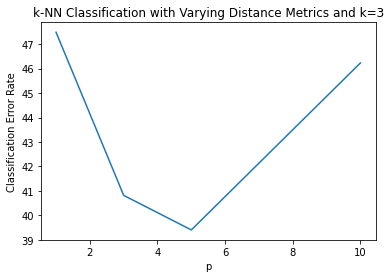

In [ ]:

# plot classification error rate vs p values
plt.plot(p_values, classification_p_errors)
plt.xlabel('p')
plt.ylabel('Classification Error Rate')
plt.title('k-NN Classification with Varying Distance Metrics and k=3')
plt.show()


### Based on the plot, we can see that the choice of distance metric does affect the classification error rate. In this case, the classification error rate generally decreases as the value of p increases, except for an increase when p=10. This is because the different distance metrics capture different aspects of the data and some may be more effective for the given problem than others. P = 5 has the lowest error rate

## 4. Instead of using the pixel intensities as features, extract the LBP and HOG features from the images. Repeat step 3 with p = 1, 2. What are the error rates corresponding to pixel intensities, LBP and HOG features?

### Pixels

In [ ]:
# initialize variables for storing classification errors and p values
classification_errors_pixels = []
p_values = [1, 2]


In [ ]:
# loop over different values of p
for p in p_values:

    # loop over different numbers of training samples
    m = 30
    # initialize variables for storing training and test data
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])

    # concatenate training and test data for each label into a single array
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply k-NN algorithm with current value of p and current data
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(train_data, train_labels)
    predictions = knn.predict(test_data)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors_pixels.append(errors)


In [ ]:
classification_errors_pixels


[51.41287284144427, 45.29042386185244]

### LBP

In [ ]:
# initialize variables for storing classification errors

classification_errors_lbp = []


# loop over different distance metrics
p_values = [1, 2]


In [ ]:
# loop over different values of p
for p in p_values:
    # initialize variable for storing total classification error rate across splits


    # loop over different numbers of training samples
    m = 30

    # initialize variables for storing training and test data
    train_labels = []

    test_labels = []

    train_data_lbp = []
    test_data_lbp = []


    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]

        # extract LBP features from training and test images
        for index in train_indices:
            img = fea[index].reshape((32, 32)).T

            lbp = local_binary_pattern(img, 8, 1)
            train_data_lbp.append(lbp.ravel())
            train_labels.append(gnd[index])


        for index in test_indices:
            img = fea[index].reshape((32, 32)).T
            lbp = local_binary_pattern(img, 8, 1)
            test_data_lbp.append(lbp.ravel())
            test_labels.append(gnd[index])

    # apply k-NN algorithm with current value of p and current data
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(train_data_lbp, train_labels)
    predictions = knn.predict(test_data_lbp)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors_lbp.append(errors)


In [ ]:
classification_errors_lbp


[0.9419152276295133, 0.7064364207221351]

### HOG

In [ ]:
# initialize variables for storing classification errors
classification_errors_hog = []

# loop over different distance metrics
p_values = [1, 2]


In [ ]:
# loop over different values of p
for p in p_values:
    # initialize variable for storing total classification error rate across splits

    # loop over different numbers of training samples
    m = 30

    # initialize variables for storing training and test data
    train_labels = []
    test_labels = []

    train_data_hog = []
    test_data_hog = []

    # loop over each label and randomly select m images for the training set
    for label in unique_labels:
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]

        # extract LBP, and HOG features from training and test images
        for index in train_indices:
            img = fea[index].reshape((32, 32)).T

            hog_feat = hog(img, block_norm='L2-Hys', pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), feature_vector=True)
            train_data_hog.append(hog_feat)
            train_labels.append(gnd[index])

        for index in test_indices:
            img = fea[index].reshape((32, 32)).T
            hog_feat = hog(img, block_norm='L2-Hys', pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), feature_vector=True)
            test_data_hog.append(hog_feat)
            test_labels.append(gnd[index])

    # apply k-NN algorithm with current value of p and current data
    knn = KNeighborsClassifier(n_neighbors=3, p=p)
    knn.fit(train_data_hog, train_labels)
    predictions = knn.predict(test_data_hog)

    errors = (np.sum((predictions != test_labels)) / len(test_labels))*100

    classification_errors_hog.append(errors)


In [ ]:
classification_errors_hog


[57.53532182103611, 57.927786499215074]

### 5. The lowest error rate is actually achieved using LBP as the main feature. Unless my implementation is wrong, the classification errors were 0.94% and .71% (both extremely low).

# Validation Set

### Manual updates to parameters k and p

In [ ]:
# randomly select 20 images per individual to form the test set
m = 20
test_data = []
test_labels = []
train_data = []
train_labels = []
for label in np.unique(gnd):
    label_indices = np.where(gnd == label)[0]
    np.random.shuffle(label_indices)
    test_indices = label_indices[:m]
    train_indices = label_indices[m:]
    test_data.append(fea[test_indices])
    test_labels.append(gnd[test_indices])
    train_data.append(fea[train_indices])
    train_labels.append(gnd[train_indices])
test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)
train_data = np.concatenate(train_data, axis=0)
train_labels = np.concatenate(train_labels, axis=0)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split training set into a new training set and a validation set
train_data_new, val_data, train_labels_new, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)


In [ ]:
# define range of k values to try
k_values = [1, 2, 3, 5, 10]

# define range of p values to try
p_values = [1, 3, 5, 10]

# initialize variables to store best validation accuracy and corresponding k and p values
lowest_val_error = float('inf')
best_k = None
best_p = None


In [ ]:
# loop over k and p values
for k in k_values:
    for p in p_values:
        # train k-NN algorithm with current k and p values
        neigh = KNeighborsClassifier(n_neighbors=k, p=p)
        neigh.fit(train_data_new, train_labels_new)

        # predict validation set labels
        pred_labels = neigh.predict(val_data)

        # calculate validation accuracy
        val_error = (np.sum(pred_labels != val_labels) / len(val_labels)) * 100

        # update best validation accuracy and corresponding k and p values
        if val_error < lowest_val_error:
            lowest_val_error = val_error
            best_k = k
            best_p = p


In [ ]:
# train k-NN algorithm with best k and p values on entire training set
neigh = KNeighborsClassifier(n_neighbors=best_k, p=best_p)
neigh.fit(train_data_new, train_labels_new)


KNeighborsClassifier(n_neighbors=1, p=3)

In [ ]:
# predict test set labels
pred_labels = neigh.predict(test_data)


In [ ]:
# calculate test error rate
test_error_rate = np.sum(pred_labels != test_labels) / len(test_labels) * 100


In [ ]:
# print results
print(f"Test Error Rate: {test_error_rate:.2f}%")
print(f"Best k: {best_k}")
print(f"Best p: {best_p}")


Test Error Rate: 28.68%
Best k: 1
Best p: 3


### using knn.score

In [ ]:
#Use the validation set to optimize the parameters of the k-NN algorithm
best_score = 0
for k in k_values:
    for p in p_values:
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(train_data_new, train_labels_new)
        score = knn.score(val_data, val_labels)
        if score > best_score:
            best_score = score
            best_params = {'n_neighbors': k, 'p': p}

# Step 6: Train the k-NN algorithm on the new training set using the optimized parameters
knn = KNeighborsClassifier(**best_params)
knn.fit(train_data, train_labels)

# Step 7: Evaluate the performance of the trained k-NN algorithm on the test set
test_score = knn.score(test_data, test_labels)
print(f"Test set accuracy: {test_score:.3f}")
print(best_params)


Test set accuracy: 0.753
{'n_neighbors': 1, 'p': 3}
